<img src='https://tr.super-hobby.com/zdjecia/9/5/4/45034_rd.jpg'>
<a href="https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data" target=_blank> dataset</a>

### German Traffic Sign Recognition System

This project aims to develop a traffic sign recognition system using convolutional neural networks (CNNs) on a dataset of over 50,000 German traffic sign images from 43 different classes. The project goals are to create an accurate and reliable traffic sign recognition model, upload this model to the Hugging Face platform, and then develop a simple mobile application using App Inventor. This project is an important step towards improving traffic safety and providing real-time traffic sign recognition support for drivers.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [ ]:
# Kaggle de çalışırken cnn projelerinde cpu çok zorluyor bilgisayarı, accelator ayrlarından gpu-4 seçmek hızlandırıyor.

In [3]:
#!pip install tensorflow

In [4]:
import cv2
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from sklearn.model_selection import train_test_split

In [5]:
train_csv=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')
test_csv=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

In [6]:
train = '/kaggle/input/gtsrb-german-traffic-sign/train'
test = '/kaggle/input/gtsrb-german-traffic-sign/test'

In [7]:
meta='/kaggle/input/gtsrb-german-traffic-sign/Meta'

In [8]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [9]:
path = '/kaggle/input/gtsrb-german-traffic-sign/train'
label_list = []
img_list = []

for kind in classes:
    kind_path = os.path.join(path, str(kind))
    
    for img in os.listdir(kind_path):
        img_list.append(os.path.join(kind_path, img))
        label_list.append(kind)

In [10]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [11]:
df.tail()

img  label
39204  /kaggle/input/gtsrb-german-traffic-sign/train/...     42
39205  /kaggle/input/gtsrb-german-traffic-sign/train/...     42
39206  /kaggle/input/gtsrb-german-traffic-sign/train/...     42
39207  /kaggle/input/gtsrb-german-traffic-sign/train/...     42
39208  /kaggle/input/gtsrb-german-traffic-sign/train/...     42

In [12]:
x=[]
for img in df['img']:  #pil ile de okuyabilirsin
    img=cv2.imread(str(img))
    img=cv2.resize(img,(32,32)) #boyutunu 32 x 32 pixel yaptik, fazlası çok kastı
    img=img/255.0 #normalize ettik
    x.append(img)

In [13]:
x=np.array(x)

In [ ]:
# x'ten rastgele 6 resim görüntüleyelim

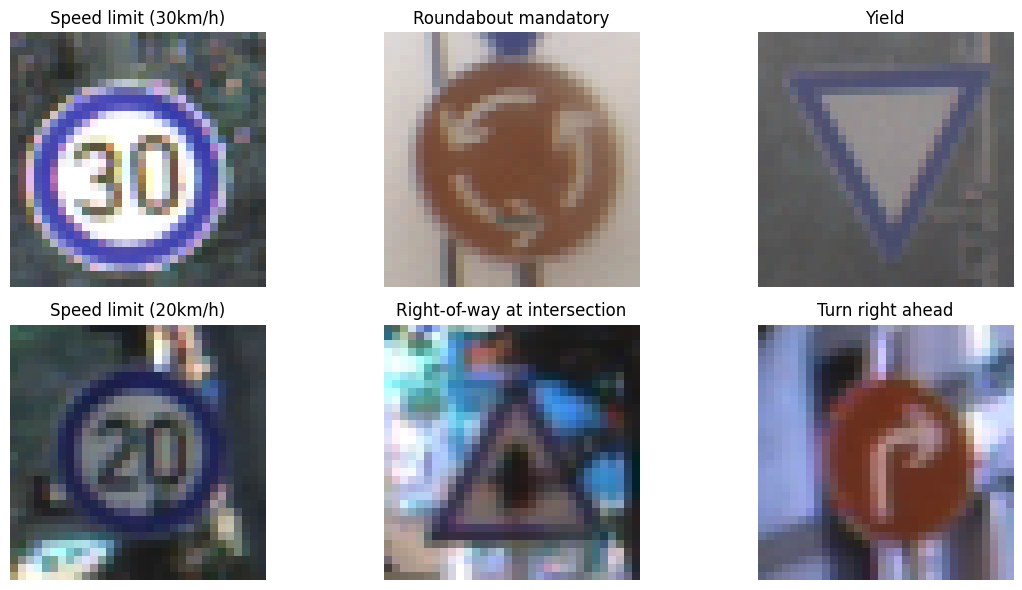

In [14]:
# Rastgele 6 resim seçme
random_indices = random.sample(range(len(x)), 6)
random_images = x[random_indices]
random_labels = [label_list[i] for i in random_indices]

# Resimleri görüntüleme
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(random_images[i])
    plt.title(classes[random_labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
y=df['label']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [17]:
model=Sequential()
model.add(Input(shape=(32,32,3))) #3 ekledik çünkü 3 tane rgb renk modeli vardı yani renkli olacak
model.add(Conv2D(32,kernel_size=(3,3),activation='relu')) #noron sayısı 32
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu')) #64 noron
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(43, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, verbose=1)

Epoch 1/50


I0000 00:00:1724702951.981052     306 service.cc:145] XLA service 0x78a568006930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724702951.981117     306 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724702951.981124     306 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 75/981 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1207 - loss: 3.4677

I0000 00:00:1724702954.538225     306 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5937 - loss: 1.5540 - val_accuracy: 0.9619 - val_loss: 0.1485
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9738 - loss: 0.1105 - val_accuracy: 0.9708 - val_loss: 0.1261
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9855 - loss: 0.0596 - val_accuracy: 0.9776 - val_loss: 0.0909
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9918 - loss: 0.0327 - val_accuracy: 0.9853 - val_loss: 0.0783
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0334 - val_accuracy: 0.9888 - val_loss: 0.0575
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9939 - loss: 0.0236 - val_accuracy: 0.9938 - val_loss: 0.0430
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0158 - val_accuracy: 0.9897 - val_loss: 0.0586
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9911 - val_

In [19]:
model.save('gtsrb_cnn_model.h5')